# Machine Learning Final Project

1. 資料視覺化
2. 資料前處理

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
from sklearn.linear_model import Lasso, Ridge

## 資料視覺化

- data

In [48]:
data = pd.read_csv(r"C:\Users\chewei\Documents\python-practice\machine learning\final project\loan.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,credit_card,0.1197,481.40,11.775290,10.85,682,5071.000000,966,13.1,5,0,0,0
1,1,all_other,0.0907,238.75,11.002100,4.86,752,7626.958333,8575,25.0,1,0,0,0
2,1,debt_consolidation,0.1222,148.28,11.835009,19.00,677,6059.958333,27587,74.8,1,1,0,0
3,1,all_other,0.0774,156.10,10.803649,4.71,797,4200.041667,1299,4.2,2,0,0,0
4,0,major_purchase,0.1253,267.73,10.819778,21.29,697,3060.041667,34938,59.6,4,1,0,0


In [44]:
data.info()

# we need to convert the data type of the 'purpose' feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9478 entries, 0 to 9477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9478 non-null   int64  
 1   purpose            9478 non-null   object 
 2   int.rate           9478 non-null   float64
 3   installment        9478 non-null   float64
 4   log.annual.inc     9478 non-null   float64
 5   dti                9478 non-null   float64
 6   fico               9478 non-null   int64  
 7   days.with.cr.line  9478 non-null   float64
 8   revol.bal          9478 non-null   int64  
 9   revol.util         9478 non-null   float64
 10  inq.last.6mths     9478 non-null   int64  
 11  delinq.2yrs        9478 non-null   int64  
 12  pub.rec            9478 non-null   int64  
 13  not.fully.paid     9478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


- 轉換 purpose 的型態方法：
1. Label Encoding
2. Dummy Variables (One-Hot Encoding)

{'all_other': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'major_purchase': 5, 'small_business': 6}


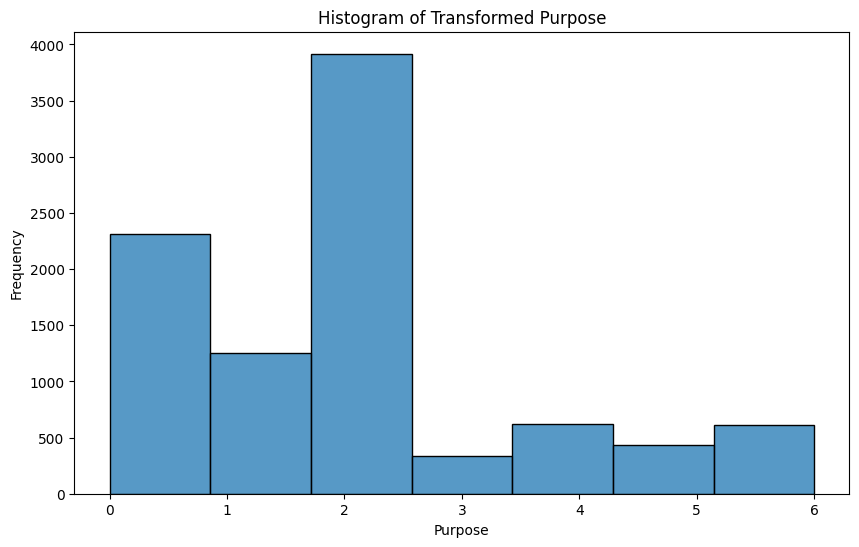

In [49]:
def purpose_transformation(data, method):
    '''將 purpose 的型態轉換'''
    if method == 'label':
        label_encoder = LabelEncoder()
        data['purpose'] = label_encoder.fit_transform(data['purpose'])
        label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    elif method == 'dummy' or method == 'one_hot':
        data = pd.get_dummies(data=data, columns=['purpose'], drop_first=True)
        label_mapping = None  
        raise ValueError("Method must be either 'label' or 'one_hot'")
    return data, label_mapping

data, labelMapping = purpose_transformation(data, 'label')

plt.figure(figsize=(10, 6))
sns.histplot(data['purpose'], kde=False, bins=len(data['purpose'].unique()))
plt.title('Histogram of Transformed Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')

print(labelMapping)
plt.show()

- 檢查是否有缺失值與 data 是否有重複

In [50]:
print(data.isnull().sum())
print('duplicate: ', data.duplicated().sum())

# 無缺失值與重複的 data

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
duplicate:  0


- 查看各變數的型態

int.rate              0.164135
installment           0.910142
log.annual.inc        0.033303
dti                   0.023261
fico                  0.469720
days.with.cr.line     1.156222
revol.bal            11.213374
revol.util            0.062470
dtype: float64


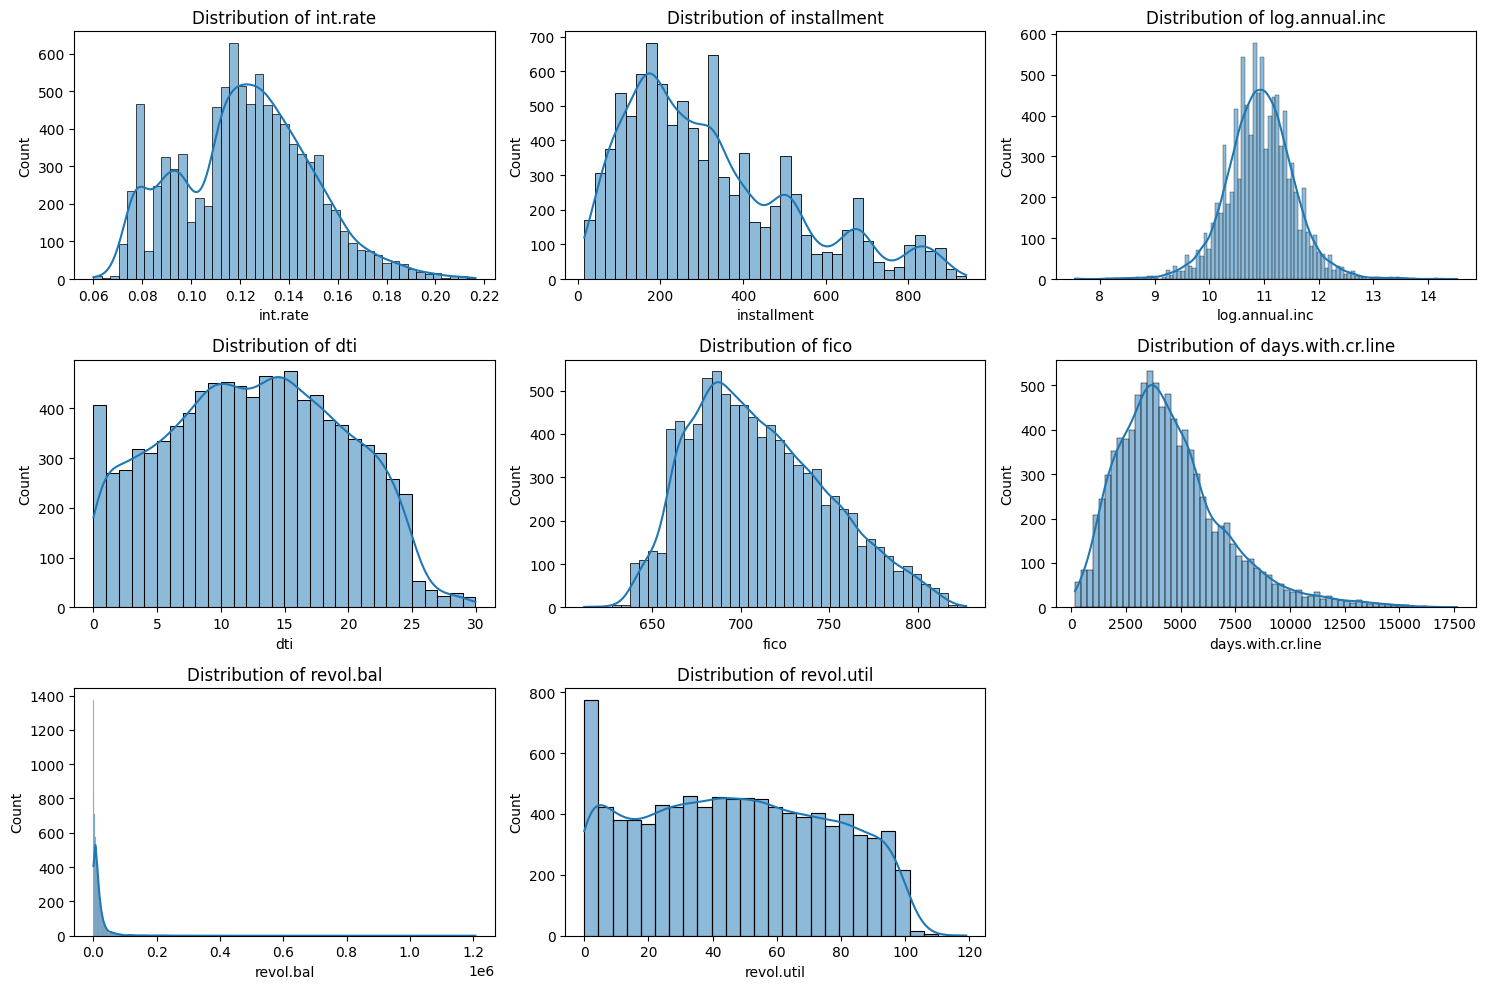

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

skewColumns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
skewness = data[skewColumns].skew()
print(skewness)



plt.figure(figsize=(15, 10))
for i, column in enumerate(skewColumns):
    plt.subplot((len(skewColumns) + 2) // 3, 3, i + 1)  
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Unique values in credit.policy : [0, 1]
Unique values in purpose : [0, 1, 2, 3, 4, 5, 6]
Unique values in inq.last.6mths : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 27, 28, 31, 32, 33]
Unique values in delinq.2yrs : [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13]
Unique values in pub.rec : [0, 1, 2, 3, 4, 5]
Unique values in not.fully.paid : [0, 1]


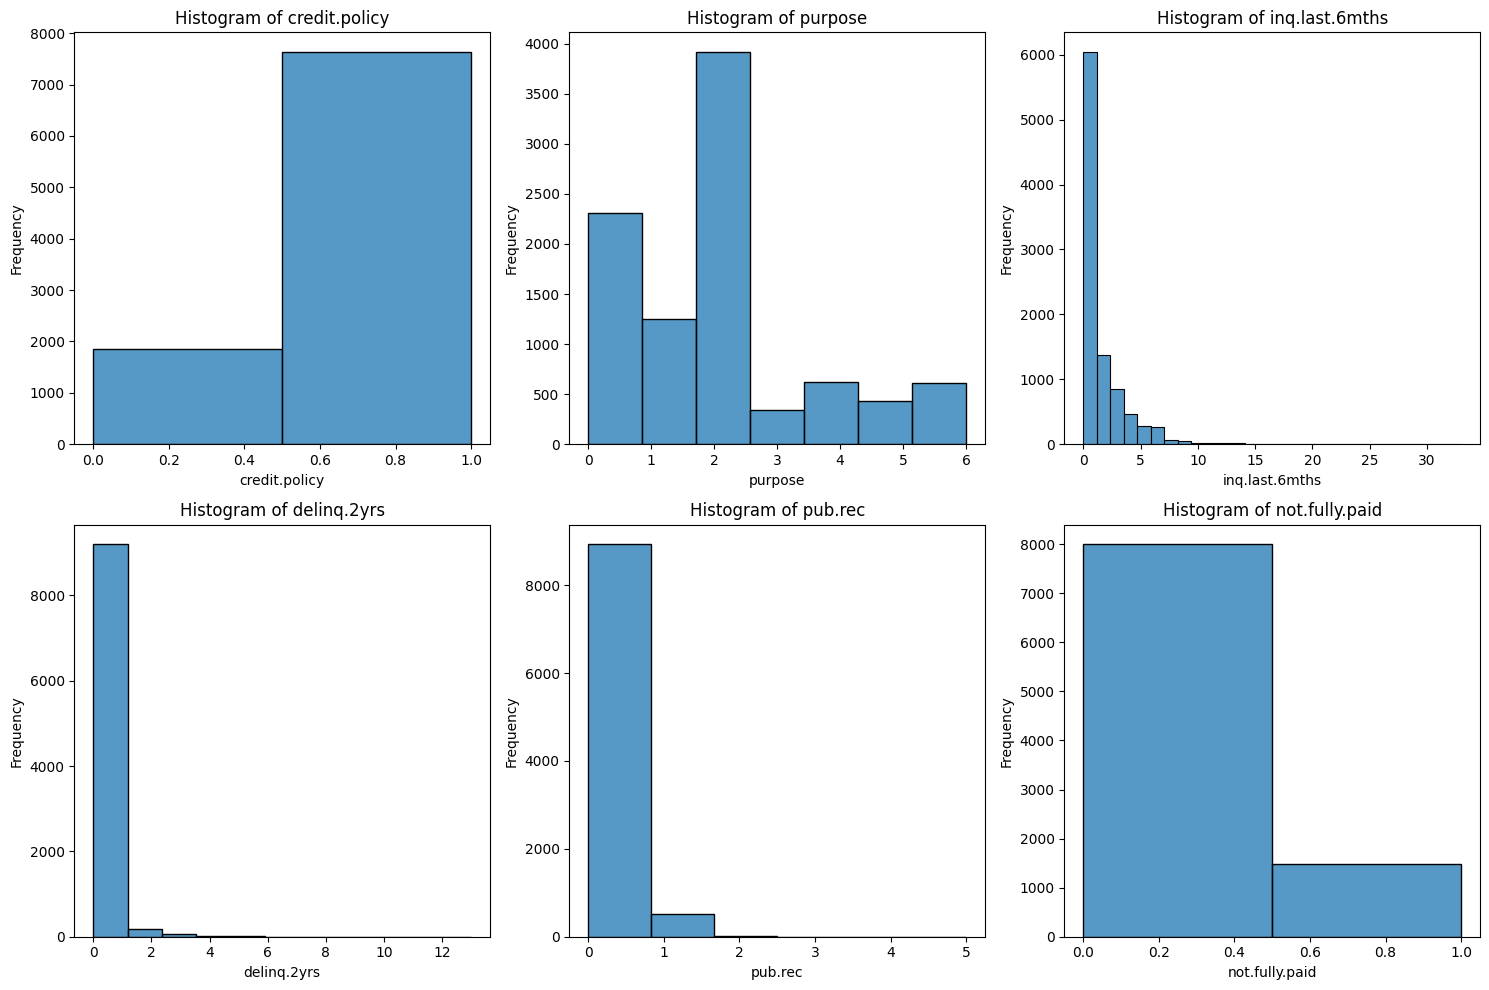

In [65]:
variables = ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

for var in variables:
    unique_values = data[var].unique()
    unique_values = sorted(unique_values)
    print(f"Unique values in {var} : {unique_values}")

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[var], kde=False, bins=len(data[var].unique()))
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    if var == 'purpose' and label_mapping:
        plt.xticks(ticks=list(label_mapping.values()), labels=list(label_mapping.keys()))

plt.tight_layout()
plt.show()


- feature 之間的相關性

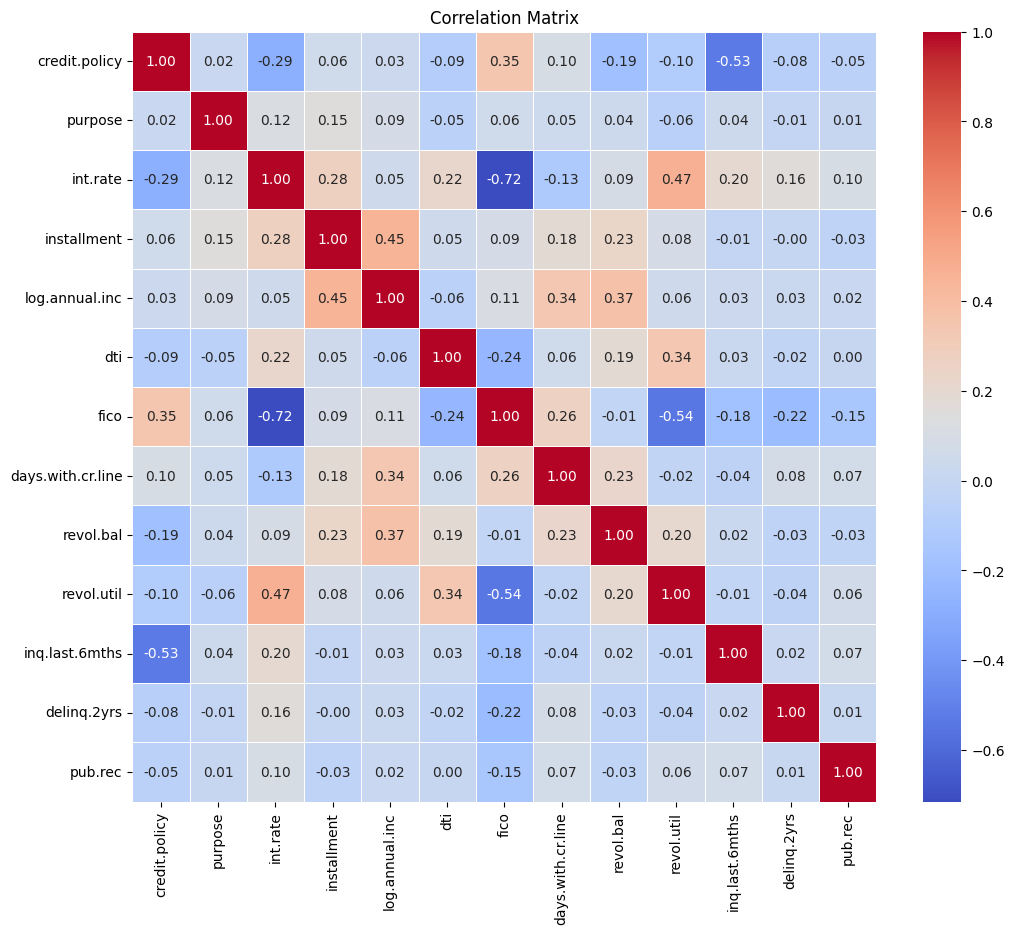

In [66]:
data_to_plot = data.drop(columns=['not.fully.paid'])

correlation_matrix = data_to_plot.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 'fico' 'int.rate' 高度負相關，故在選擇 feature 時可以二擇一，避免共線性問題。

- 各 feature 與 'not.fully.paid' 之間的相關性

C:\Users\chewei\AppData\Local\Temp\ipykernel_8040\1001621486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm')


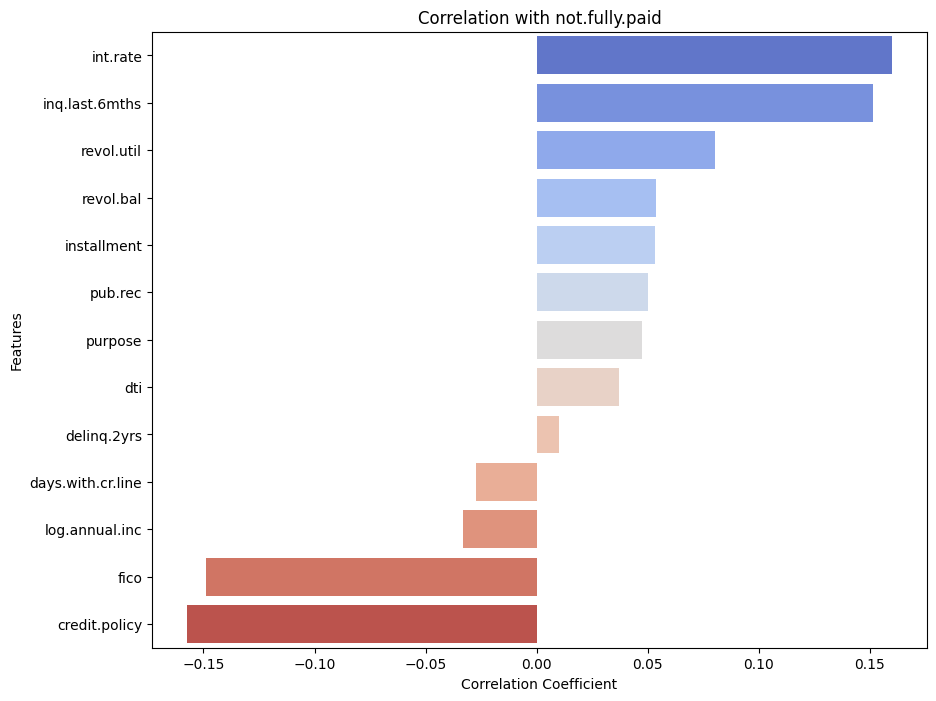

In [72]:
correlations = data.corr()['not.fully.paid'].drop('not.fully.paid')

# 將相關性按照絕對值大小排序
sorted_correlations = correlations.sort_values(ascending=False)

# 繪製圖表
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm')
plt.title('Correlation with not.fully.paid')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()